# Day 2
batch size 256 lr 1e-3, normed weighted, rotated, cartesian

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 7.361s 


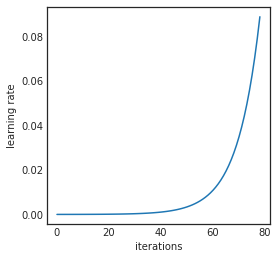

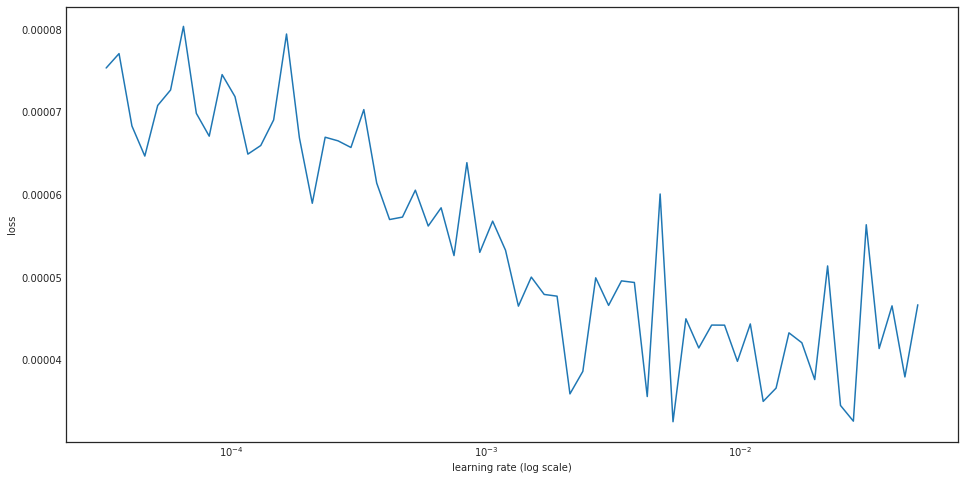

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.17234587202e-05
2 New best found: 3.74589621615e-05
3 New best found: 3.62928901382e-05
4 New best found: 3.55239059617e-05
6 New best found: 3.43561406179e-05
7 New best found: 3.42186000647e-05
10 New best found: 3.41480560094e-05
11 New best found: 3.33273086292e-05
12 New best found: 3.31299420483e-05
13 New best found: 3.30558425724e-05
14 New best found: 3.29125903249e-05
15 New best found: 3.28870311186e-05
21 New best found: 3.2850713275e-05
22 New best found: 3.26627746422e-05
24 New best found: 3.23636039449e-05
26 New best found: 3.23549628708e-05
27 New best found: 3.22714689045e-05
28 New best found: 3.22324298072e-05
48 New best found: 3.21060418168e-05
49 New best found: 3.20656096204e-05
53 New best found: 3.1991074875e-05
54 New best found: 3.19483850905e-05
55 New best found: 3.19425624192e-05
57 New best found: 3.18888067765e-05
60 New best f

12 New best found: 3.36782448667e-05
13 New best found: 3.35582715501e-05
14 New best found: 3.34714459925e-05
15 New best found: 3.34519459407e-05
19 New best found: 3.33488688039e-05
24 New best found: 3.32219113933e-05
25 New best found: 3.32075682589e-05
26 New best found: 3.29148006562e-05
28 New best found: 3.28430535326e-05
31 New best found: 3.28417480596e-05
41 New best found: 3.28286399469e-05
45 New best found: 3.27501869949e-05
46 New best found: 3.26965504657e-05
48 New best found: 3.26416314491e-05
53 New best found: 3.25829932619e-05
54 New best found: 3.25711555999e-05
55 New best found: 3.25561992884e-05
58 New best found: 3.25204231356e-05
59 New best found: 3.25057775565e-05
60 New best found: 3.24976945029e-05
93 New best found: 3.24677871125e-05
102 New best found: 3.24416750422e-05
107 New best found: 3.24097189542e-05
117 New best found: 3.23802650462e-05
Early stopping after 167 epochs
Score is: {'loss': 3.2380265046196869e-05, 'AUC': 0.10355457345998098, 'wAUC'

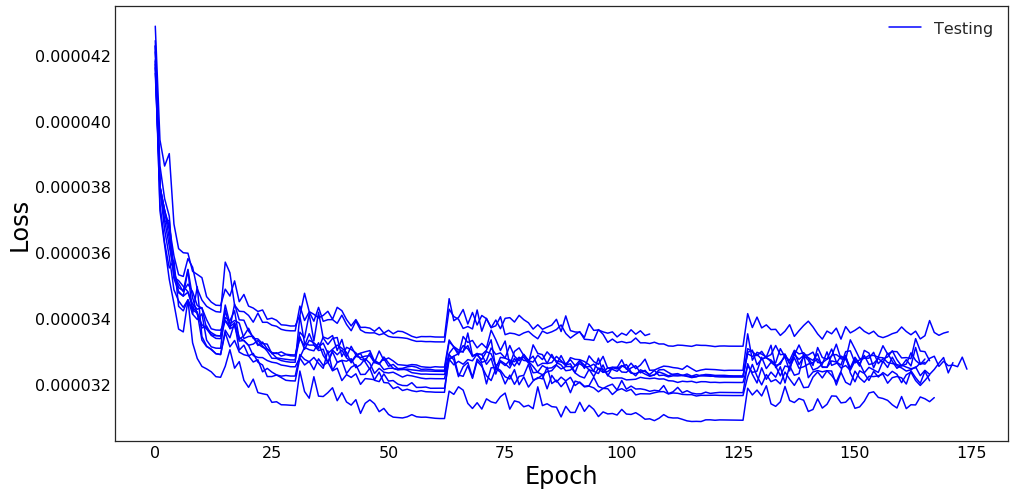

Mean wAUC = 0.0649 +- 0.0009
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=50, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [7]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [8]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 3 with loss = 3.0851765668e-05
Model 1 is 7 with loss = 3.16282206383e-05
Model 2 is 0 with loss = 3.16912396055e-05
Model 3 is 9 with loss = 3.20360581459e-05
Model 4 is 2 with loss = 3.21879103596e-05
Model 5 is 1 with loss = 3.2205815011e-05
Model 6 is 6 with loss = 3.22099951289e-05
Model 7 is 5 with loss = 3.23802650462e-05
Model 8 is 4 with loss = 3.31316161381e-05
Model 9 is 8 with loss = 3.34038693758e-05


## Response on development data

In [9]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000247231245482s per sample

Predicting batch 2 out of 10
Prediction took 0.000166340676744s per sample

Predicting batch 3 out of 10
Prediction took 0.000158832953051s per sample

Predicting batch 4 out of 10
Prediction took 0.000164159798622s per sample

Predicting batch 5 out of 10
Prediction took 0.000185665404797s per sample

Predicting batch 6 out of 10
Prediction took 0.000186013996601s per sample

Predicting batch 7 out of 10
Prediction took 0.000180534541607s per sample

Predicting batch 8 out of 10
Prediction took 0.000176506022452s per sample

Predicting batch 9 out of 10
Prediction took 0.000185221563286s per sample

Predicting batch 10 out of 10
Prediction took 0.000159965693292s per sample



In [10]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.904022726626, weighted 0.940476518893


## Response on val data

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000176697206497s per sample

Predicting batch 2 out of 10
Prediction took 0.000208396196365s per sample

Predicting batch 3 out of 10
Prediction took 0.000162445402145s per sample

Predicting batch 4 out of 10
Prediction took 0.000247039794922s per sample

Predicting batch 5 out of 10
Prediction took 0.000189063405991s per sample

Predicting batch 6 out of 10
Prediction took 0.000207220411301s per sample

Predicting batch 7 out of 10
Prediction took 0.000173883390427s per sample

Predicting batch 8 out of 10
Prediction took 0.000189914608002s per sample

Predicting batch 9 out of 10
Prediction took 0.000166259384155s per sample

Predicting batch 10 out of 10
Prediction took 0.00015757598877s per sample



In [12]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.900465292049, weighted 0.934268643647


## Evaluation

### Import in dataframe

In [13]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [14]:
valData = convertToDF(valData)

50000 candidates loaded


In [15]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

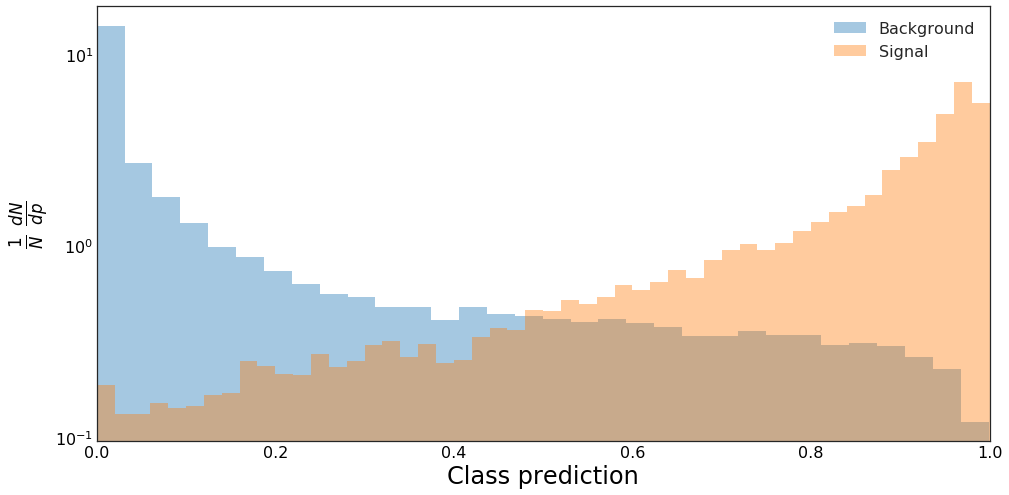

In [16]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [17]:
amsScan(valData)

[0.93784874677658081, 1.6732917616819611]


NameError: global name 'valData' is not defined

In [18]:
def scoreTest(ensemble, weights):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

def saveTest(cut, name):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    
    data = pandas.DataFrame()
    data['EventId'] = getFeature('EventId', testData)
    data['pred_class'] = getFeature('pred', testData)
    
    data['Class'] = 'b'
    data.loc[data.pred_class >= cut, 'Class'] = 's'

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [19]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000163474815542s per sample

Predicting batch 2 out of 10
Prediction took 0.000166778820211s per sample

Predicting batch 3 out of 10
Prediction took 0.000168825162541s per sample

Predicting batch 4 out of 10
Prediction took 0.000161903455041s per sample

Predicting batch 5 out of 10
Prediction took 0.000163382400166s per sample

Predicting batch 6 out of 10
Prediction took 0.000170009639046s per sample

Predicting batch 7 out of 10
Prediction took 0.000160603124445s per sample

Predicting batch 8 out of 10
Prediction took 0.000165696165778s per sample

Predicting batch 9 out of 10
Prediction took 0.000202145433426s per sample

Predicting batch 10 out of 10
Prediction took 0.000164518490705s per sample



In [20]:
saveTest(0.93784874677658081, 'Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart')

../Data/Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart_test.csv


!kaggle competitions submit -c higgs-boson -f ../Data/Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart_test.csv -m"Day2"